In [1]:
import json
import pandas as pd

# Đọc dữ liệu từ file JSON
with open('all_labeled.json', 'r', encoding='utf-8') as f:
    data_list = json.load(f)

# Danh sách để lưu các từ điển đã xử lý
processed_list = []

# Xử lý từng mục trong dữ liệu
for entry in data_list:
    # Sao chép từ điển "data" để tránh sửa đổi dữ liệu gốc
    data_dict = entry['data'].copy()
    
    # Lấy annotation đầu tiên (giả định chỉ có một annotation)
    annotation = entry['annotations'][0]
    
    # Duyệt qua từng kết quả trong "result"
    for result in annotation['result']:
        from_name = result['from_name']  # Lấy tên trường (ví dụ: Image_helpfulness)
        choice = result['value']['choices'][0]  # Lấy giá trị choice đầu tiên
        data_dict[from_name] = choice  # Thêm vào từ điển
    
    # Thêm từ điển đã xử lý vào danh sách
    processed_list.append(data_dict)

# Tạo DataFrame từ danh sách các từ điển
df = pd.DataFrame(processed_list)
df.head()


,user_name,rating,comment,images,created_at,thank_count,product_id,product_name,has_image,has_comment,product_category,Image_helpfulness,Comment_helpfulness,All_helpfulness
0,Mint Mint,5,giao hàng nhanh và hsd xa,[https://salt.tikicdn.com/ts/review/8f/d2/cf/0...,1640476800000,0,2454325,Thùng 48 Hộp Sữa Uống Dutch Lady Cô Gái Hà Lan...,1,1,food&drink,2,3,2
1,Nguyễn Bích Hạnh,5,Truyện rất hay mình bàng hoàng nhận ra tác giả...,[],1625097600000,6,76013370,Được Học (Tái Bản),0,1,book,1,4,2
2,Lan Anh,5,Sản phẩm chất lượng tốt tiện lợi giá cả hợp lý...,[],1661126400000,0,185248203,Máy Xay Đồ Ăn Dặm Cho Bé 6 Lưỡi Cối Thuỷ Tinh ...,0,1,stationery,1,3,2
3,Tâm Châu,1,Giao hàng nhanh nhưng máy kêu rất to như máy cày,[],1649894400000,0,27577966,Máy Xay Sinh Tố Lock&Lock EJM462 (350W - 1.2 L...,0,1,stationery,1,4,2
4,Bé Tuấn,2,giao hàng nhanh nhưng mà sách lại bị ố vàng ng...,[https://salt.tikicdn.com/ts/review/6f/f6/8d/4...,1653177600000,0,16284286,Tuổi Thơ Dữ Dội - Tập 1 (Tái Bản),1,1,book,5,4,3


### Chọn biến để phân tích


In [2]:
# Chỉ giữ lại các trường mong muốn
cols = ['product_name', 'Image_helpfulness', 'Comment_helpfulness', 'All_helpfulness', 'comment', 'images']
df = df[cols]

df['comment_word_count'] = df['comment'].apply(lambda x: len(str(x).split()))

df.shape
df.head()

,product_name,Image_helpfulness,Comment_helpfulness,All_helpfulness,comment,images,comment_word_count
0,Thùng 48 Hộp Sữa Uống Dutch Lady Cô Gái Hà Lan...,2,3,2,giao hàng nhanh và hsd xa,[https://salt.tikicdn.com/ts/review/8f/d2/cf/0...,6
1,Được Học (Tái Bản),1,4,2,Truyện rất hay mình bàng hoàng nhận ra tác giả...,[],59
2,Máy Xay Đồ Ăn Dặm Cho Bé 6 Lưỡi Cối Thuỷ Tinh ...,1,3,2,Sản phẩm chất lượng tốt tiện lợi giá cả hợp lý...,[],13
3,Máy Xay Sinh Tố Lock&Lock EJM462 (350W - 1.2 L...,1,4,2,Giao hàng nhanh nhưng máy kêu rất to như máy cày,[],11
4,Tuổi Thơ Dữ Dội - Tập 1 (Tái Bản),5,4,3,giao hàng nhanh nhưng mà sách lại bị ố vàng ng...,[https://salt.tikicdn.com/ts/review/6f/f6/8d/4...,30


In [3]:
helpfulness_cols = ['Image_helpfulness', 'Comment_helpfulness', 'All_helpfulness']
 # Chuyển đổi các cột helpfulness sang kiểu chuỗi
df = df.sort_values(by=helpfulness_cols)
df_filtered = df[(df['Image_helpfulness'] != '1') & (df['Comment_helpfulness'] != '1') ]

Skewness Comment_helpfulness: -0.126
Skewness All_helpfulness: -1.467


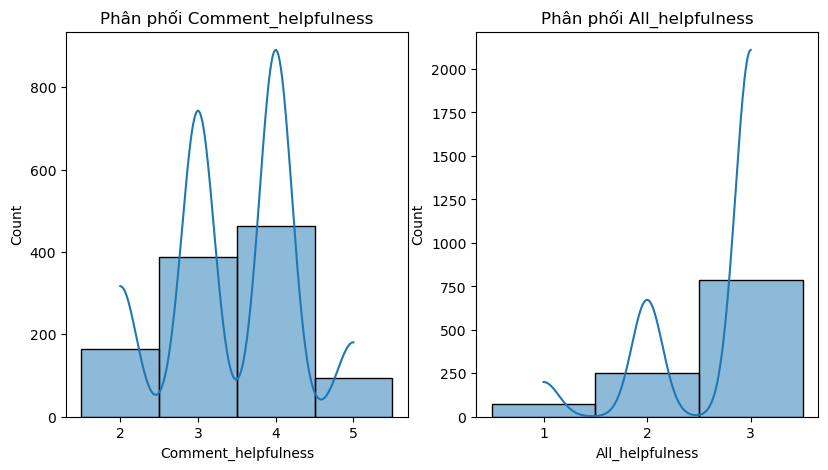

In [4]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.histplot(df_filtered['Comment_helpfulness'], kde=True)
plt.title('Phân phối Comment_helpfulness')

plt.subplot(1, 3, 3)
sns.histplot(df_filtered['All_helpfulness'], kde=True)
plt.title('Phân phối All_helpfulness')
# Tính skewness cho các cột helpfulness
skew_comment = skew(df_filtered['Comment_helpfulness'].astype(float), nan_policy='omit')
skew_all = skew(df_filtered['All_helpfulness'].astype(float), nan_policy='omit')

print(f"Skewness Comment_helpfulness: {skew_comment:.3f}")
print(f"Skewness All_helpfulness: {skew_all:.3f}")

plt.show()

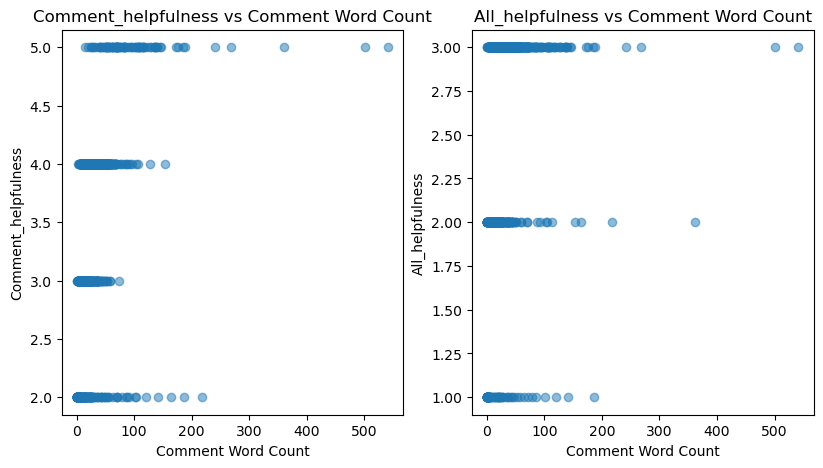

In [5]:
# Drop rows with missing values in the relevant columns
df_scatter = df_filtered.dropna(subset=['Comment_helpfulness', 'All_helpfulness', 'comment_word_count'])

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
plt.scatter(df_scatter['comment_word_count'], df_scatter['Comment_helpfulness'].astype(int), alpha=0.5)
plt.xlabel('Comment Word Count')
plt.ylabel('Comment_helpfulness')
plt.title('Comment_helpfulness vs Comment Word Count')

plt.subplot(1, 3, 3)
plt.scatter(df_scatter['comment_word_count'], df_scatter['All_helpfulness'].astype(int), alpha=0.5)
plt.xlabel('Comment Word Count')
plt.ylabel('All_helpfulness')
plt.title('All_helpfulness vs Comment Word Count')
plt.show()

## Vẽ word cloud

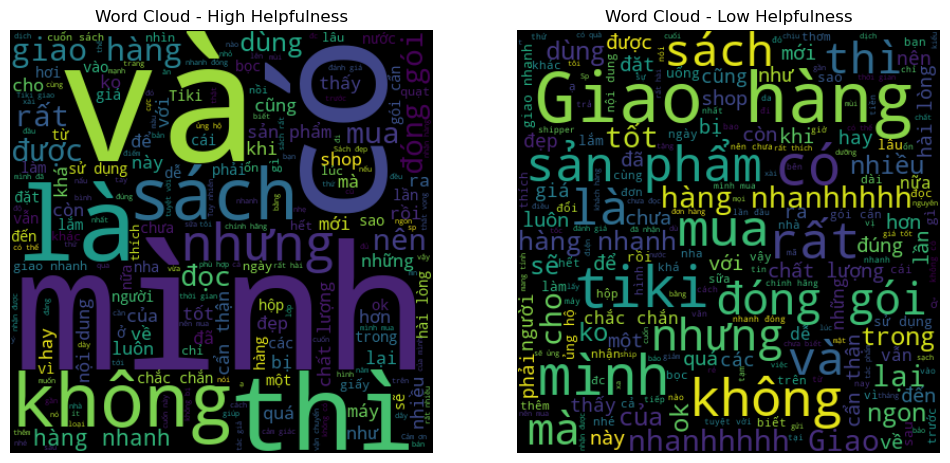

In [6]:
from wordcloud import WordCloud

mean_helpfulness = df_filtered['All_helpfulness'].astype(float).mean()
high_helpfulness_comments = ' '.join(df_filtered[df_filtered['All_helpfulness'].astype(float) > mean_helpfulness]['comment'].dropna())
low_helpfulness_comments = ' '.join(df_filtered[df_filtered['All_helpfulness'].astype(float) < mean_helpfulness]['comment'].dropna())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_high = WordCloud(width=400, height=400).generate(high_helpfulness_comments)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Word Cloud - High Helpfulness')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_low = WordCloud(width=400, height=400).generate(low_helpfulness_comments)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title('Word Cloud - Low Helpfulness')
plt.axis('off')
plt.show()

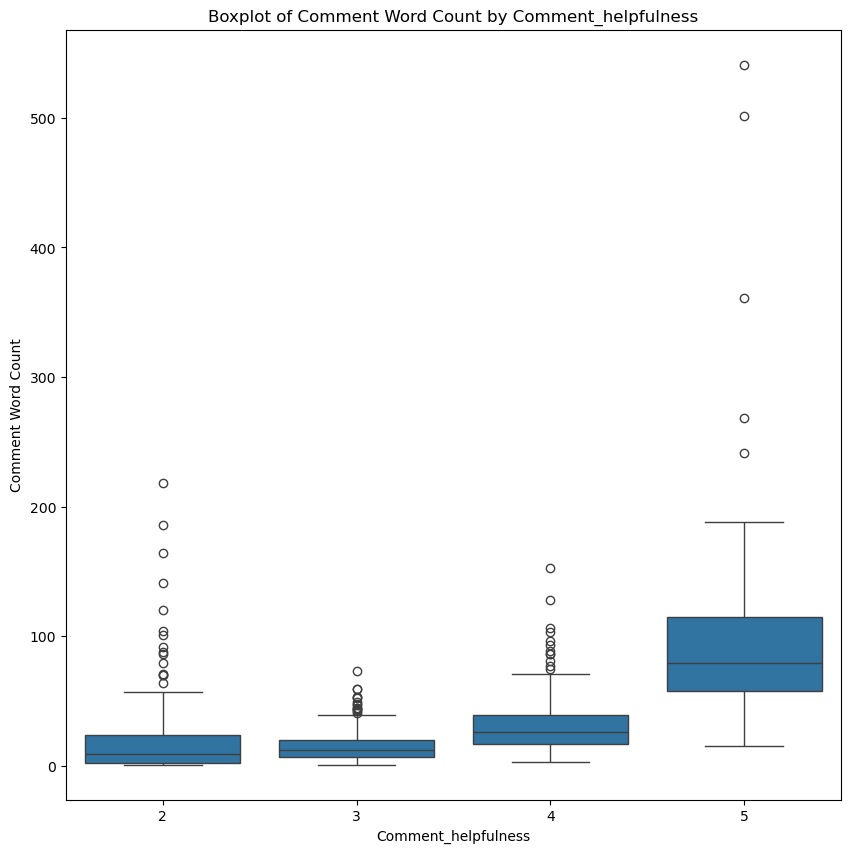

In [7]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Comment_helpfulness', y='comment_word_count', data=df_filtered)
plt.xlabel('Comment_helpfulness')
plt.ylabel('Comment Word Count')
plt.title('Boxplot of Comment Word Count by Comment_helpfulness')
plt.show()

### log transform

C:\Users\Sacchi\AppData\Local\Temp\ipykernel_18308\2933619210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_comment_word_count'] = np.log1p(df_filtered['comment_word_count'])  # log1p để xử lý giá trị 0


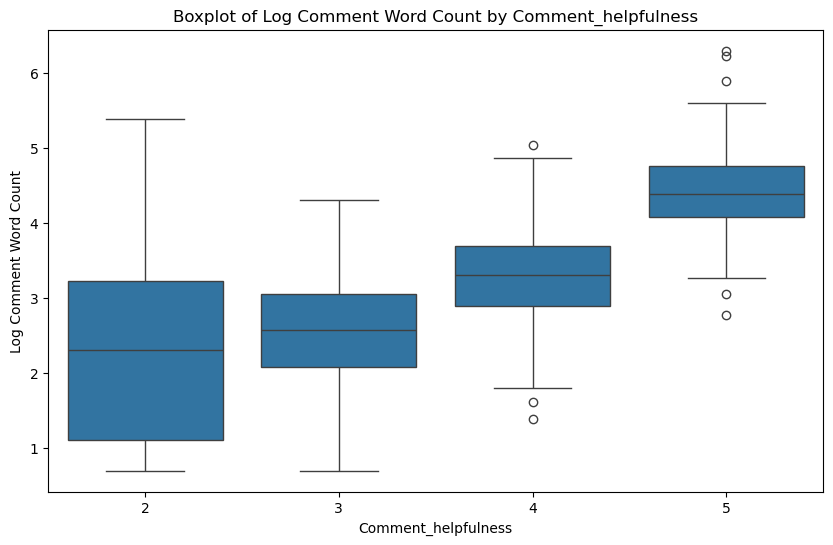

C:\Users\Sacchi\AppData\Local\Temp\ipykernel_18308\2933619210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_comment_word_count'] = np.log1p(df_filtered['comment_word_count'])  # log1p để xử lý giá trị 0


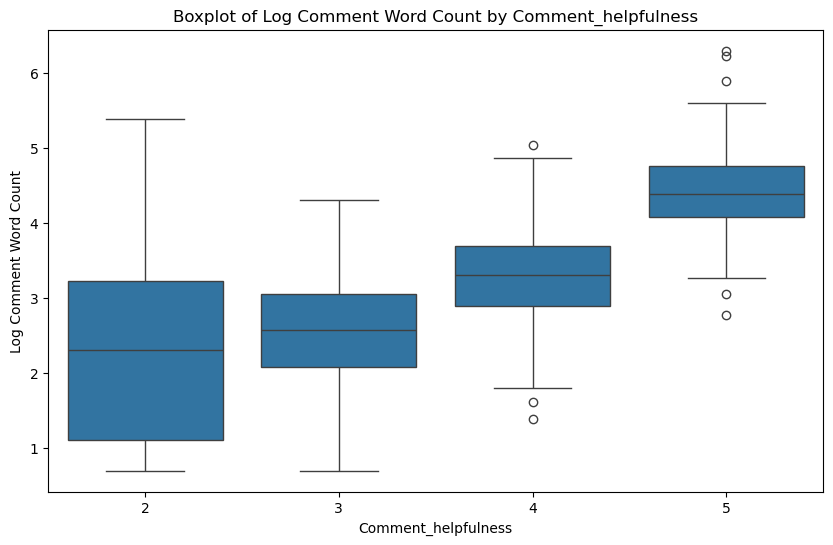

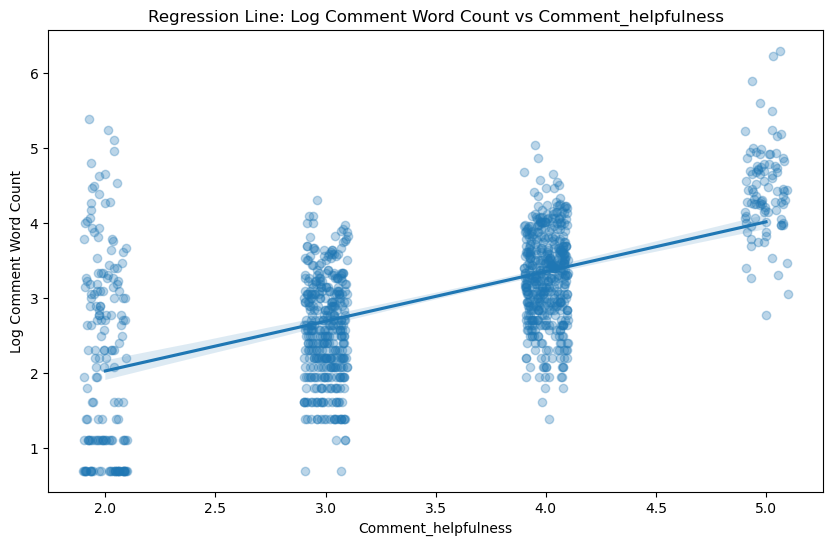

In [10]:

# Thêm cột log-transformed cho comment_word_count
df_filtered['log_comment_word_count'] = np.log1p(df_filtered['comment_word_count'])  # log1p để xử lý giá trị 0

# Vẽ boxplot với dữ liệu đã transform
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comment_helpfulness', y='log_comment_word_count', data=df_filtered)
plt.xlabel('Comment_helpfulness')
plt.ylabel('Log Comment Word Count')
plt.title('Boxplot of Log Comment Word Count by Comment_helpfulness')
plt.show()

# Đảm bảo Comment_helpfulness là số thực khi vẽ regplot
plt.figure(figsize=(10, 6))
sns.regplot(
    x=df_filtered['Comment_helpfulness'].astype(float),
    y=df_filtered['log_comment_word_count'],
    x_jitter=0.1,
    scatter_kws={'alpha': 0.3}
)
plt.xlabel('Comment_helpfulness')
plt.ylabel('Log Comment Word Count')
plt.title('Regression Line: Log Comment Word Count vs Comment_helpfulness')
plt.show()

### TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tạo TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit và transform trên cột 'comment' của df_filtered
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['comment'].fillna(''))

# Lấy các từ khóa (feature names)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Hiển thị kích thước ma trận TF-IDF
tfidf_matrix.shape

(1110, 1000)

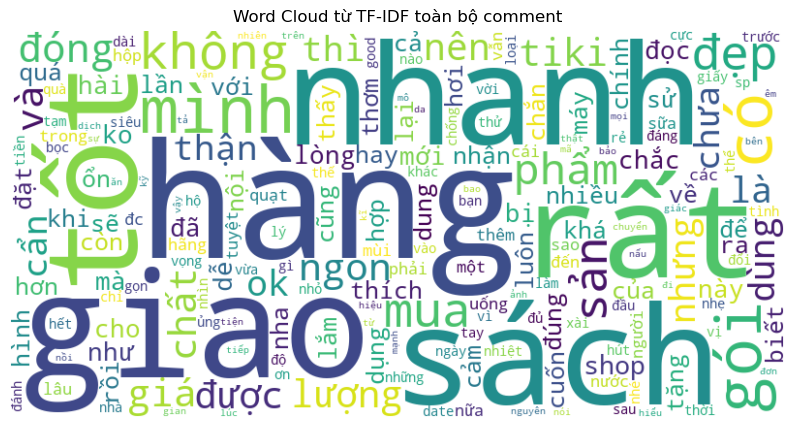

In [12]:
import numpy as np

# Vẽ word cloud cho ma trận TF-IDF tổng hợp toàn bộ comment

# Lấy tổng trọng số TF-IDF cho mỗi từ
tfidf_sum = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
tfidf_dict = dict(zip(tfidf_feature_names, tfidf_sum))

# Tạo word cloud từ trọng số TF-IDF
plt.figure(figsize=(10, 6))
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud từ TF-IDF toàn bộ comment')
plt.show()

In [13]:
# Tính số lượng outlier dựa trên quy tắc IQR cho tất cả các cột số trong df
numeric_cols = df.select_dtypes(include='number').columns

outlier_count = 0
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_count += outliers.shape[0]

print(f"Số lượng outlier trong df: {outlier_count}")

Số lượng outlier trong df: 154


c:\Users\Sacchi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


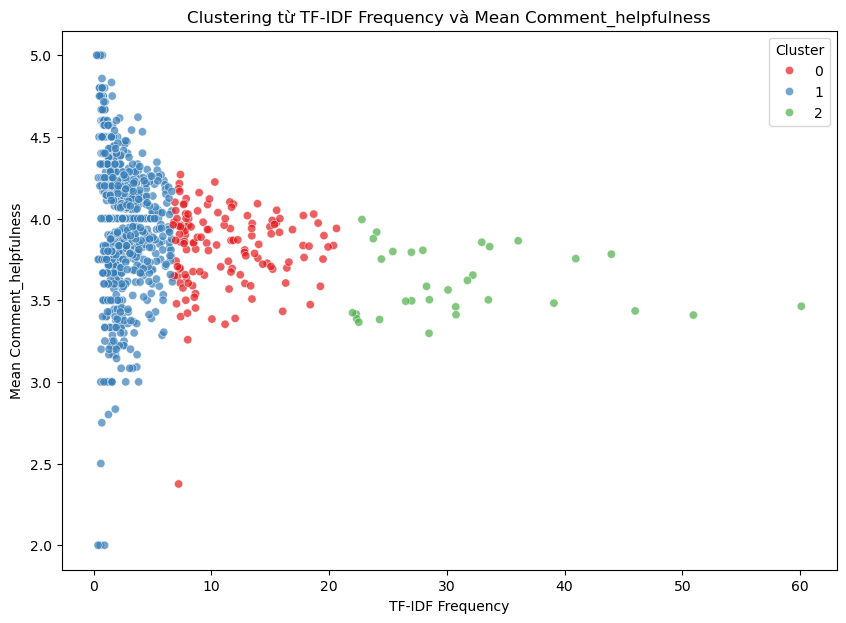

In [14]:
from sklearn.cluster import KMeans

# Lấy tổng trọng số TF-IDF cho mỗi từ (frequency)
tfidf_freq = tfidf_sum

# Tính trung bình Comment_helpfulness cho từng từ (chỉ tính trên các comment chứa từ đó)
comment_helpfulness = df_filtered['Comment_helpfulness'].astype(float).values
word_mean_helpfulness = []
for idx, word in enumerate(tfidf_feature_names):
    # Lấy chỉ số các comment chứa từ này
    word_idx = tfidf_matrix[:, idx].nonzero()[0]
    if len(word_idx) > 0:
        mean_help = comment_helpfulness[word_idx].mean()
    else:
        mean_help = 0
    word_mean_helpfulness.append(mean_help)
word_mean_helpfulness = np.array(word_mean_helpfulness)

# Tạo DataFrame cho clustering
tfidf_cluster_df = pd.DataFrame({
    'word': tfidf_feature_names,
    'tfidf_freq': tfidf_freq,
    'mean_comment_helpfulness': word_mean_helpfulness
})

# Clustering với KMeans
X = tfidf_cluster_df[['tfidf_freq', 'mean_comment_helpfulness']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
tfidf_cluster_df['cluster'] = kmeans.fit_predict(X)

# Vẽ scatter plot với màu theo cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=tfidf_cluster_df,
    x='tfidf_freq',
    y='mean_comment_helpfulness',
    hue='cluster',
    palette='Set1',
    alpha=0.7
)
plt.xlabel('TF-IDF Frequency')
plt.ylabel('Mean Comment_helpfulness')
plt.title('Clustering từ TF-IDF Frequency và Mean Comment_helpfulness')
plt.legend(title='Cluster')
plt.show()

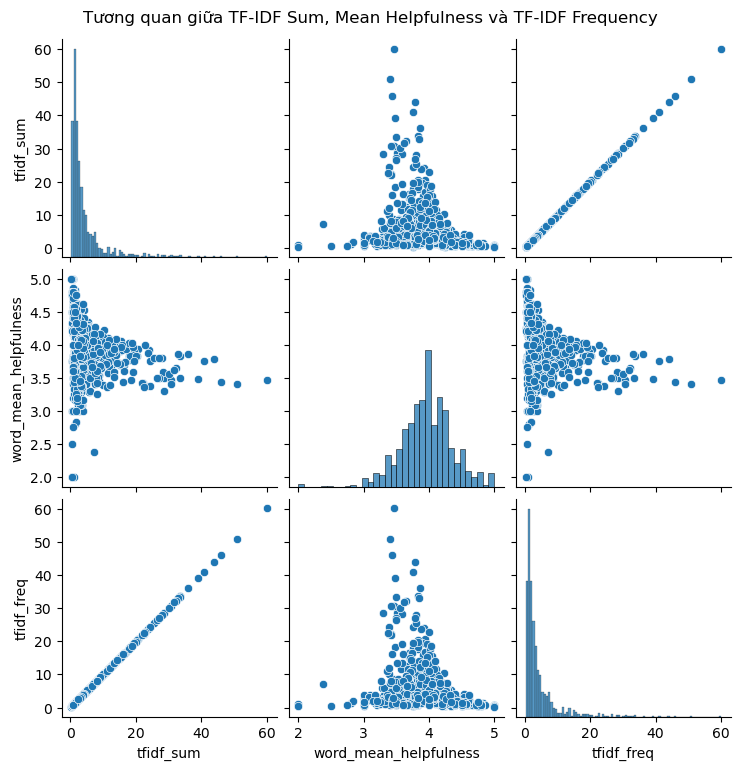

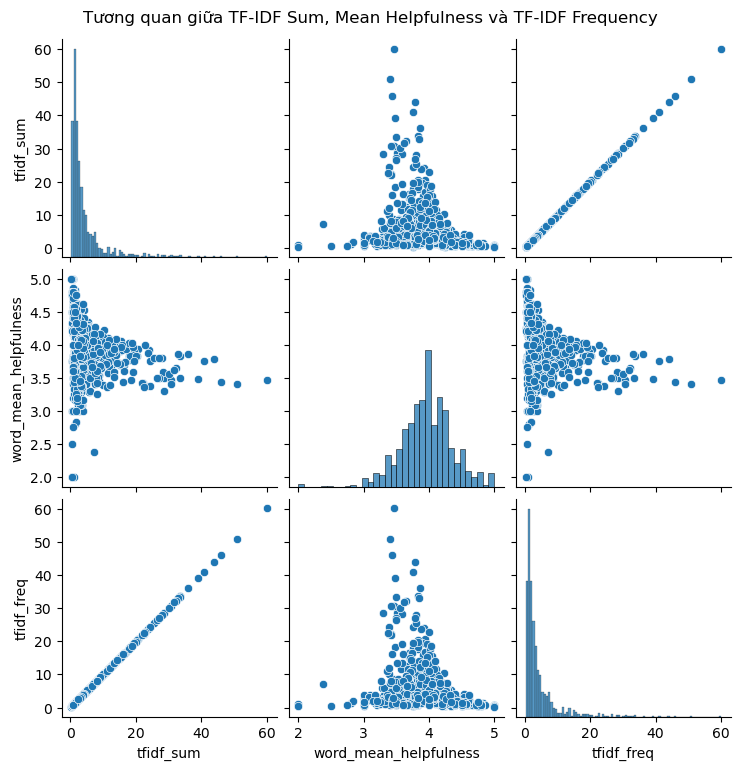

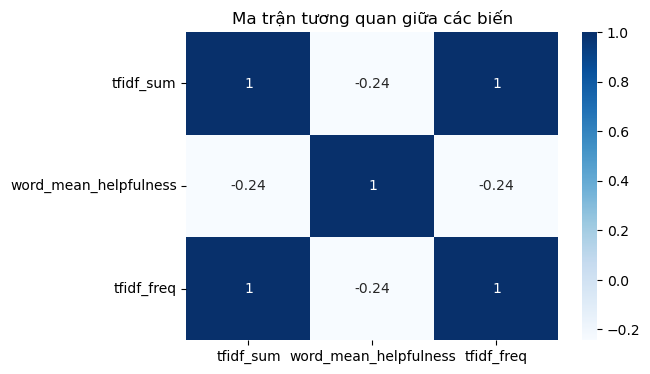

In [15]:
# Vẽ ma trận scatterplot để thể hiện tương quan giữa tfidf_sum, word_mean_helpfulness và tfidf_freq

import seaborn as sns
import matplotlib.pyplot as plt

# tfidf_freq thực chất là tfidf_sum (tổng trọng số TF-IDF cho mỗi từ)
tfidf_corr_df = pd.DataFrame({
    'tfidf_sum': tfidf_sum,
    'word_mean_helpfulness': word_mean_helpfulness,
    'tfidf_freq': tfidf_sum  # tfidf_freq = tfidf_sum
})

sns.pairplot(tfidf_corr_df)
plt.suptitle('Tương quan giữa TF-IDF Sum, Mean Helpfulness và TF-IDF Frequency', y=1.02)
plt.show()

# Vẽ heatmap ma trận tương quan
plt.figure(figsize=(6, 4))
corr = tfidf_corr_df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Ma trận tương quan giữa các biến')
plt.show()